In [12]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [13]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [14]:
random_state=1515

In [15]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [16]:
min_len = 2.936

In [17]:
def dataset(file_name):
   # with soundfile.SoundFile(file_name) as sound_file:
       # X = sound_file.read(dtype="float32", start = 0, stop = )
        X= librosa.load(file_name, duration = min_len)
        result=np.array([])     
        result=np.hstack(X)
        return result

In [18]:
#Load the data and SAVE IT FOR each sound file
x,y=[],[]
for file in glob.glob("E:\\ravd\\*\*\\*.wav"):
    emotion = file.split("-")[2]
    if emotion == '03':
        e = 'pos'        #happy
        y.append(e)
        D=dataset(file)
        x.append(D)
    elif emotion == '08':
        e = 'pos'
        y.append(e)     #sur
        D=dataset(file)
        x.append(D)
    elif emotion == '05':
        e = 'neg'
        y.append(e)      #angry
        D=dataset(file)
        x.append(D)
    elif emotion == '06':
        e = 'neg'       #feaeful
        y.append(e)
        D=dataset(file)
        x.append(D)
    else:
        continue 

In [21]:
data = pd.DataFrame(y, columns =['emo'])
data

,emo
0,pos
1,pos
2,pos
3,pos
4,pos
...,...
1315,pos
1316,pos
1317,pos
1318,pos


In [32]:
data = pd.DataFrame(x)
data['labels'] = y
data

,0,1,2,3,4,5,6,7,8,9,...,64731,64732,64733,64734,64735,64736,64737,64738,64739,labels
0,-5.948986e-07,6.926457e-07,-8.032085e-07,9.368358e-07,-1.120051e-06,1.438483e-06,-2.362021e-06,-1.305057e-05,6.345203e-07,1.749165e-08,...,6.121176e-02,5.462212e-02,4.680791e-02,3.330955e-02,2.316078e-02,2.048782e-02,2.468614e-02,0.0,22050.0,pos
1,-8.829171e-05,-4.964646e-04,-1.892702e-04,5.345593e-05,4.225537e-04,5.063385e-04,-5.686249e-05,2.589745e-05,3.582006e-06,3.609849e-06,...,3.693475e-03,4.310992e-03,5.725809e-03,6.533356e-03,7.109073e-03,6.888140e-03,6.770490e-03,0.0,22050.0,pos
2,2.522645e-08,-3.287576e-08,4.112771e-08,-4.965493e-08,5.802028e-08,-6.567257e-08,7.191730e-08,-7.604518e-08,7.719989e-08,-7.448869e-08,...,2.797415e-02,3.000744e-02,3.250948e-02,2.878287e-02,2.363805e-02,1.543337e-02,1.252481e-02,0.0,22050.0,pos
3,4.180361e-07,-2.859065e-07,2.283106e-07,-1.551268e-06,-3.269724e-05,-8.943293e-06,9.381099e-08,-1.309576e-05,-9.695752e-06,-6.222079e-06,...,3.732043e-03,4.704708e-03,6.198818e-03,7.140817e-03,7.925309e-03,7.968898e-03,8.412185e-03,0.0,22050.0,pos
4,-3.479700e-05,-3.427188e-05,-2.692929e-05,-4.159283e-06,2.215595e-06,-1.695614e-06,1.389029e-06,-1.157198e-06,9.709867e-07,-8.227702e-07,...,-6.763336e-02,-6.602057e-02,-5.902903e-02,-1.976188e-02,4.234429e-02,7.971920e-02,9.652092e-02,0.0,22050.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.878144e-07,1.491625e-05,-2.201167e-06,1.534003e-06,-1.183592e-06,9.147770e-07,-6.853793e-07,0.0,22050.0,pos
1316,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.981934e-03,-1.680995e-03,-1.171876e-03,-1.222049e-03,-6.059513e-04,-6.933684e-04,-7.136876e-04,0.0,22050.0,pos
1317,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.750383e-03,1.130283e-03,1.924083e-03,2.573003e-03,1.712301e-03,5.732423e-04,7.644788e-04,0.0,22050.0,pos
1318,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.017983e-05,-9.692648e-05,-1.586807e-04,-1.447693e-04,-3.314845e-05,-2.244015e-05,-4.234130e-05,0.0,22050.0,pos


In [33]:
data = data.drop(64739, axis =1)
data

,0,1,2,3,4,5,6,7,8,9,...,64730,64731,64732,64733,64734,64735,64736,64737,64738,labels
0,-5.948986e-07,6.926457e-07,-8.032085e-07,9.368358e-07,-1.120051e-06,1.438483e-06,-2.362021e-06,-1.305057e-05,6.345203e-07,1.749165e-08,...,6.671016e-02,6.121176e-02,5.462212e-02,4.680791e-02,3.330955e-02,2.316078e-02,2.048782e-02,2.468614e-02,0.0,pos
1,-8.829171e-05,-4.964646e-04,-1.892702e-04,5.345593e-05,4.225537e-04,5.063385e-04,-5.686249e-05,2.589745e-05,3.582006e-06,3.609849e-06,...,3.490194e-03,3.693475e-03,4.310992e-03,5.725809e-03,6.533356e-03,7.109073e-03,6.888140e-03,6.770490e-03,0.0,pos
2,2.522645e-08,-3.287576e-08,4.112771e-08,-4.965493e-08,5.802028e-08,-6.567257e-08,7.191730e-08,-7.604518e-08,7.719989e-08,-7.448869e-08,...,3.143051e-02,2.797415e-02,3.000744e-02,3.250948e-02,2.878287e-02,2.363805e-02,1.543337e-02,1.252481e-02,0.0,pos
3,4.180361e-07,-2.859065e-07,2.283106e-07,-1.551268e-06,-3.269724e-05,-8.943293e-06,9.381099e-08,-1.309576e-05,-9.695752e-06,-6.222079e-06,...,2.422989e-03,3.732043e-03,4.704708e-03,6.198818e-03,7.140817e-03,7.925309e-03,7.968898e-03,8.412185e-03,0.0,pos
4,-3.479700e-05,-3.427188e-05,-2.692929e-05,-4.159283e-06,2.215595e-06,-1.695614e-06,1.389029e-06,-1.157198e-06,9.709867e-07,-8.227702e-07,...,-7.168489e-02,-6.763336e-02,-6.602057e-02,-5.902903e-02,-1.976188e-02,4.234429e-02,7.971920e-02,9.652092e-02,0.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.735712e-07,4.878144e-07,1.491625e-05,-2.201167e-06,1.534003e-06,-1.183592e-06,9.147770e-07,-6.853793e-07,0.0,pos
1316,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.041041e-03,-1.981934e-03,-1.680995e-03,-1.171876e-03,-1.222049e-03,-6.059513e-04,-6.933684e-04,-7.136876e-04,0.0,pos
1317,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.531466e-03,1.750383e-03,1.130283e-03,1.924083e-03,2.573003e-03,1.712301e-03,5.732423e-04,7.644788e-04,0.0,pos
1318,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.536615e-05,4.017983e-05,-9.692648e-05,-1.586807e-04,-1.447693e-04,-3.314845e-05,-2.244015e-05,-4.234130e-05,0.0,pos


In [34]:
y = data['labels'].values
X = data.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)

In [35]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [36]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [37]:
check = pd.DataFrame(y_train)
check['encoded'] = y_train_enc
check

,0,encoded
0,pos,1
1,neg,0
2,neg,0
3,neg,0
4,neg,0
...,...,...
1051,neg,0
1052,pos,1
1053,pos,1
1054,pos,1


In [38]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [39]:
pixel_size = (128,128)     #227
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


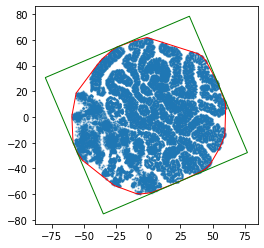

In [40]:
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

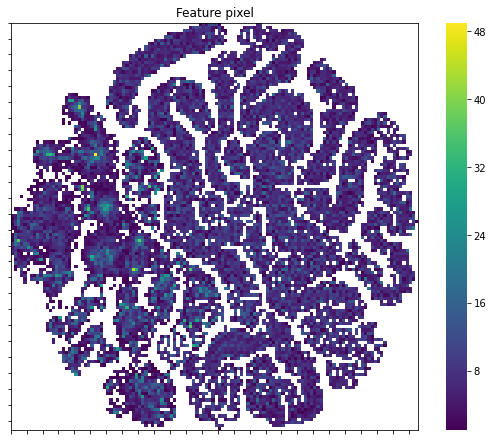

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature pixel")

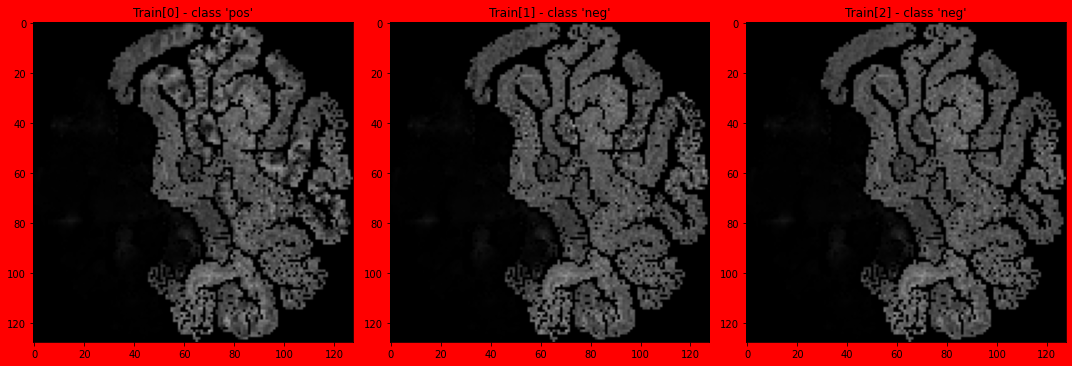

In [42]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i],cmap="viridis")
    fig.set_facecolor("red")
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

In [43]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import warnings; 
warnings.simplefilter('ignore')

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [45]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1', 
    pretrained=True, verbose=False)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), 
                              stride=(1,1))
net = net.to(device)

In [46]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [47]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device)

In [48]:
batch_size = 100

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [50]:
for epoch in range(200):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)   # casting to long
        
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.804
[20] loss: 0.698
[40] loss: 0.678
[60] loss: 0.675
[80] loss: 0.662
[100] loss: 0.669
[120] loss: 0.653
[140] loss: 0.654
[160] loss: 0.647
[180] loss: 0.642
[199] loss: 0.646


In [51]:
train_predicted = np.empty(0)
train_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        train_predicted = np.append(train_predicted, pred)
        train_true = np.append(train_true, labels.cpu().detach().numpy())

In [52]:
test_predicted = np.empty(0)
test_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())


In [53]:
print(f"The train accuracy was {accuracy_score(train_predicted, train_true):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

The train accuracy was 0.639
The test accuracy was 0.614


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_true, test_predicted)
cm

array([[104,  46],
       [ 56,  58]], dtype=int64)

<AxesSubplot:>

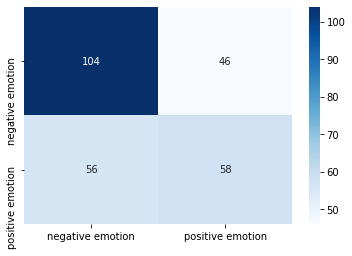

In [55]:
import seaborn as sns

cm_df = pd.DataFrame(cm, index=['negative emotion' , 'positive emotion'], columns=['negative emotion' , 'positive emotion'])
sns.heatmap(cm_df, annot=True, 
            fmt='', cmap='Blues')


In [56]:
accuracy=accuracy_score(y_true=test_true, y_pred=test_predicted)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(test_true,test_predicted))
print()

Logistic-Accuracy: 61.36%
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67       150
         1.0       0.56      0.51      0.53       114

    accuracy                           0.61       264
   macro avg       0.60      0.60      0.60       264
weighted avg       0.61      0.61      0.61       264




In [57]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([69.33333333, 50.87719298])

Text(0.5, 1.0, 'accuracy of each class')

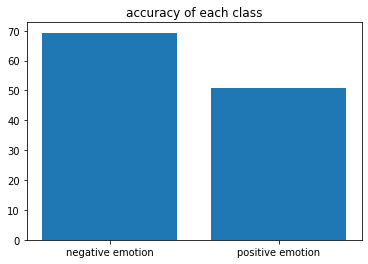

In [58]:
plt.bar(['negative emotion' , 'positive emotion'],cm.diagonal()*100)
plt.xticks(rotation=0)
plt.title("accuracy of each class")